In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
X = np.array([1,2,3,4,5,6])
x2 = np.array([7.5, 11, 16, 18, 20, 26])

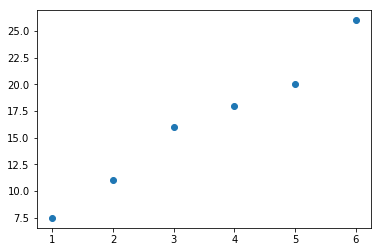

In [3]:
plt.scatter(x1, x2)
plt.show()

In [67]:
X = np.c_[x1, x2]

In [11]:
pca = PCA()
reduced = pca.fit_transform(X)
reduced

array([[ -9.26049952e+00,   9.65263430e-03],
       [ -5.62047228e+00,   2.38560598e-02],
       [ -5.36562171e-01,  -3.68391297e-01],
       [  1.65958219e+00,   5.22629108e-02],
       [  3.85572654e+00,   4.72917119e-01],
       [  9.90222524e+00,  -1.90297426e-01]])

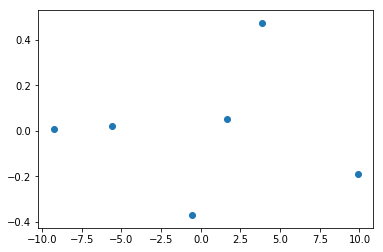

In [12]:
plt.scatter(reduced[:, 0], reduced[:, 1])
plt.show()

In [68]:
pca = PCA()
reduced = pca.fit_transform(X)
pca.components_

array([[ 0.27096719,  0.96258858],
       [ 0.96258858, -0.27096719]])

In [23]:
pca.explained_variance_

array([ 46.66187276,   0.07979391])

In [21]:
pca.inverse_transform(reduced)

array([[  0.99070848,   7.50261555],
       [  1.97703643,  11.00646421],
       [  3.35460926,  15.90017805],
       [  3.94969232,  18.01416153],
       [  4.54477538,  20.12814502],
       [  6.18317813,  25.94843564]])

In [33]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [34]:
boston = datasets.load_boston()
scaler = StandardScaler()
X = scaler.fit_transform(boston.data)

In [42]:
pca = PCA()
reduced = pca.fit_transform(X)
pca.explained_variance_ratio_

array([ 0.47097344,  0.11015872,  0.09547408,  0.06598453,  0.0641974 ,
        0.05074235,  0.04146288,  0.0305034 ,  0.02134115,  0.01694306,
        0.0143203 ,  0.01301288,  0.00488581])

In [40]:
total = pca.explained_variance_.sum()
k = 0
taken = 0
while taken/total < 0.95:
    taken += pca.explained_variance_[k]
    k = k + 1
print(k)

9


In [41]:
pca = PCA(n_components = k)
reduced = pca.fit_transform(X)
pca.explained_variance_

array([ 6.13477883,  1.43489911,  1.24362073,  0.85949754,  0.83621879,
        0.6609568 ,  0.54008485,  0.39732939,  0.27798432])

In [45]:
mean_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1 = np.random.multivariate_normal(mean_vec1, cov_mat1, 100)

In [47]:
mean_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2 = np.random.multivariate_normal(mean_vec2, cov_mat2, 100)

In [51]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d

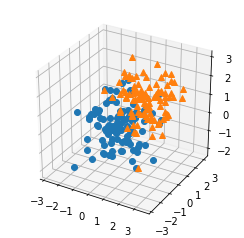

In [57]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
# ax = fig.add_subplot(222, projection='3d')
# ax = fig.add_subplot(223, projection='3d')
# ax = fig.add_subplot(224, projection='3d')
ax.plot(class1[:,0], class1[:,1], class1[:,2], 'o')
ax.plot(class2[:,0], class2[:,1], class2[:,2], '^')
plt.show()

In [58]:
all_data = np.concatenate((class1, class2))

In [71]:
pca = PCA(n_components = 2)
reduced = pca.fit_transform(all_data)
pca.explained_variance_

array([ 1.8447623 ,  1.11500625])

In [72]:
pca.components_

array([[-0.65515852, -0.46366689, -0.59647324],
       [ 0.42447929, -0.8790322 ,  0.21707076]])

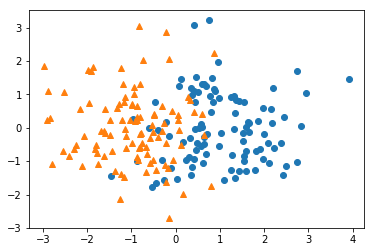

In [73]:
plt.plot(reduced[0:100, 0],reduced[0:100, 1], "o")
plt.plot(reduced[100:200, 0],reduced[100:200, 1], "^")
plt.show()

In [77]:
covar = np.cov(all_data.T)

In [94]:
eig_val, eig_vectors = np.linalg.eig(covar)
eig_val, eig_vectors

(array([ 1.8447623 ,  0.85009969,  1.11500625]),
 array([[-0.65515852, -0.62496771,  0.42447929],
        [-0.46366689, -0.11097478, -0.8790322 ],
        [-0.59647324,  0.77272243,  0.21707076]]))

In [105]:
eig_val_component_pair = []
for i in range(len(eig_val)):
    eig_val_component_pair.append([eig_val[i], eig_vectors[:, i]])

In [106]:
eig_val_component_pair.sort(reverse = True)
eig_val_component_pair

[[1.8447622964009827, array([-0.65515852, -0.46366689, -0.59647324])],
 [1.1150062467499016, array([ 0.42447929, -0.8790322 ,  0.21707076])],
 [0.85009969377595707, array([-0.62496771, -0.11097478,  0.77272243])]]

In [107]:
pca.explained_variance_, pca.components_

(array([ 1.8447623 ,  1.11500625]),
 array([[-0.65515852, -0.46366689, -0.59647324],
        [ 0.42447929, -0.8790322 ,  0.21707076]]))